In [1]:
#This implements two layer neural network with hints from Usman Malick's code at StackAbuse.com
#Weights and biases are found using gradient descent.
import numpy as np
import matplotlib.pyplot as plt
import random
#Activation functions
def tanh(x):
    return np.tanh(x)
#Derivative of activation function
def tanh_deriv(x):
    return (1.0 - np.tanh(x)**2)

In [2]:
#This is data 
data_feature=np.array([[-0.5,-0.5],[0.5,-0.5],[-0.5,0.5],[0.5,0.5]])
data_labels=np.array([[-0.5],[0.5],[0.5],[-0.5]])

minimum cost 1.3463177706912422e-11


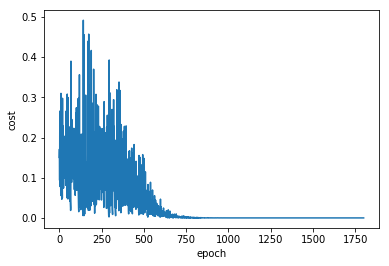

In [3]:
#Add number of neurons in the hidden layer
neuron_h_layer=6
#Initialize the weights and biases
#Weights to neuron in hidden layer, dimension(2,neuron_h_layer)
wh = np.random.uniform(-.5,.5,size=(len(data_feature[0]),neuron_h_layer)) 
#Weights to neuron in output layer, dimension(neuron_h_layer,1)
wo = np.random.uniform(-.5,.5,size=(neuron_h_layer, 1)) 
#bias hidden layer,dimension(neuron_h_layer,1)
biash=np.random.uniform(-0.5,0.5,size=(1,neuron_h_layer))
#bias output
biaso=np.random.uniform(-0.5,0.5,size=(1,1))
#learning rate
lr = 0.1 
#Initialize for making the cost plot
xplot=[]
costplot=[]
#Train the network, this implements stochastic gradient descent, taking 1 sample at a time
#in each epoch, online, on-line, or incremental learning.
for epoch in range(1800): 
    #First randomly choose a sample from the dataset, doing 1 at a time 
    #Create an array of indexes, same as length of training data
    a=np.arange(len(data_feature))
    #Randomly shuffle the array
    random.shuffle(a)
    #Pick the first element of a and choose one data point and the corresponding label
    data=data_feature[[a[0]]] #make sure it is a numpy array and not a vector
    data_l=data_labels[[a[0]]]
    # First feedforward, goes to first hidden layer
    zh = np.dot(data, wh)+biash
    #Activation of first hidden layer 
    ah = tanh(zh)
    #Output layer, takes previous layer output as input
    zo = np.dot(ah, wo)+biaso
    #This is output from the neural network
    ao = tanh(zo)

    # Calculate error
    error_out = ((1 / 2) * (np.power((ao - data_l), 2)))
    
    #Back propagation, first output layer
    dcost_dao = ao - data_l
    dao_dzo = tanh_deriv(zo) 
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Go to hidden layer

    dcost_dzo = dcost_dao * dao_dzo #known from above
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_deriv(zh) 
    dzh_dwh = data
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Update Weights, gradient descent
    wh -= lr * dcost_wh #hidden layer
    wo -= lr * dcost_wo #Output layer
    
    # Update bias, gradient descent
    biash-=lr*sum(dah_dzh * dcost_dah) #hidden layer
    biaso-=lr*sum(dcost_dzo)#Output layer
    
    #Add cost and epoch 
    xplot.append(epoch)
    costplot.append(error_out.sum())

#plot the cost as a function of iteration 
plt.plot(xplot,costplot)
plt.xlabel('epoch')
plt.ylabel('cost')
#print the minimum of cost
print("minimum cost",min(costplot))

In [4]:
print("hidden layer weights\n",wh)

hidden layer weights
 [[-0.57243967 -0.14369553 -0.99730608 -0.31374417  0.35605572 -1.57377087]
 [ 0.34745651  0.10274851 -1.25833016 -0.39569567  0.09049524 -1.44821767]]


In [5]:
print("Output layer weights \n",wo)

Output layer weights 
 [[-0.44865894]
 [ 0.27844357]
 [-1.19930841]
 [-0.33584155]
 [ 0.29639198]
 [ 1.40414072]]


In [6]:
#Calculate the output with the best value of the weights and biases from the network
zh = np.dot(data_feature, wh)+biash
ah = tanh(zh)

zo = np.dot(ah, wo)+biaso
ao = tanh(zo)

print("output of network after training\n",ao)
print("expected outputs\n ",data_labels)

output of network after training
 [[-0.49996915]
 [ 0.4999867 ]
 [ 0.49998763]
 [-0.49998796]]
expected outputs
  [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]


Repeat the above with batch gradient

minimum cost 6.321304818491792e-21


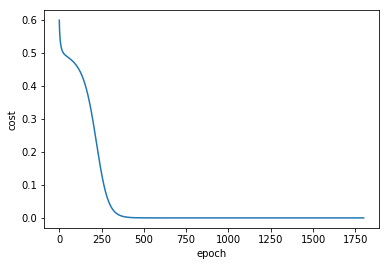

In [7]:
#Add number of neurons in the hidden layer
neuron_h_layer=6
#Initialize the weights and biases
#Weights to neuron in hidden layer, dimension(2,neuron_h_layer)
wh = np.random.uniform(-.5,.5,size=(len(data_feature[0]),neuron_h_layer)) 
#Weights to neuron in output layer, dimension(neuron_h_layer,1)
wo = np.random.uniform(-.5,.5,size=(neuron_h_layer, 1)) 
#bias hidden layer,dimension(neuron_h_layer,1)
biash=np.random.uniform(-0.5,0.5,size=(1,neuron_h_layer))
#bias output
biaso=np.random.uniform(-0.5,0.5,size=(1,1))
#learning rate
lr = 0.05

#Initialize for making the cost plot
xplot=[]
costplot=[]
#Train the network, this implements batch gradient descent, taking all sample at a time.
for epoch in range(1800): 
    data=data_feature
    data_l=data_labels
    # First feedforward, goes to first hidden layer
    zh = np.dot(data, wh)+biash
    #Activation of first hidden layer 
    ah = tanh(zh)
    #Output layer, takes previous layer output as input
    zo = np.dot(ah, wo)+biaso
    #This is output from the neural network
    ao = tanh(zo)

    # Calculate error
    error_out = ((1 / 2) * (np.power((ao - data_l), 2)))
    
    #Back propagation, first output layer
    dcost_dao = ao - data_l
    dao_dzo = tanh_deriv(zo) 
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Go to hidden layer

    dcost_dzo = dcost_dao * dao_dzo #known from above
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_deriv(zh) 
    dzh_dwh = data
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Update Weights, gradient descent
    wh -= lr * dcost_wh #hidden layer
    wo -= lr * dcost_wo #Output layer
    
    # Update bias, gradient descent
    biash-=lr*sum(dah_dzh * dcost_dah) #hidden layer
    biaso-=lr*sum(dcost_dzo)#Output layer
    
    #Add cost and epoch 
    xplot.append(epoch)
    costplot.append(error_out.sum())

#plot the cost as a function of iteration 
plt.plot(xplot,costplot)
plt.xlabel('epoch')
plt.ylabel('cost')
#print the minimum of cost
print("minimum cost",min(costplot))

Takes less number of epoch, not surprising because before I was taking one sample at a time in each epoch.

In [8]:
#Calculate the output with the best value of the weights and biases from the network
zh = np.dot(data_feature, wh)+biash
ah = tanh(zh)

zo = np.dot(ah, wo)+biaso
ao = tanh(zo)

print("output of network after training\n",ao)
print("expected outputs\n ",data_labels)

output of network after training
 [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]
expected outputs
  [[-0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]


Now do this using matrices for a more general purpose code. Following the book by Michael Nielsen 

$w_{jk}$ is the weight for the connection between the $k^{th}$
 neuron in the l layer, and the $j^{th}$
 neuron in the (l+1) layer. This implies dimensions check out for matrix multiplications and one can do z=
 (wa+b). One can write $a^l_j=\sigma\sum \limits_{k}w^l_{jk}a^{l-1}_k+b^l_k$. Or by vectorizing $a^l=\sigma (w^l a^{l-1}+b^l)$. 
 
 

minimum cost 2.1127373160693504e-14


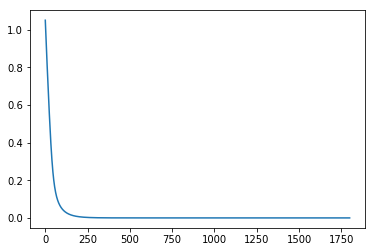

In [9]:
# 2 neuron input layer , 6 neuron hidden layer, 1 neuron output layer 
size=np.array([2,6,1]) 
biases=[np.random.randn(y, 1) for y in size[1:]]
weights = [np.random.randn(y, x) 
                        for x, y in zip(size[:-1], size[1:])]
#Data
yd=data_labels.T
xd=data_feature.T
num_layers=len(size)

def feedforward(a):
    for b, w in zip(biases,weights):
        a=tanh(np.dot(w,a)+b)
    return a

def cost_derivative(output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)  
def backprop(x,y):
    #x=data_feature.T
    nabla_b=[np.zeros(b.shape) for b in biases]
    nabla_w=[np.zeros(w.shape) for w in weights]

#feed forward
    activation=x
    activations=[x]
    zs=[]
    for b, w in zip(biases,weights):
        z=np.dot(w,activation)+b
        zs.append(z)
        activation=tanh(z)
        activations.append(activation)
       # print('activations\n',activations)
        #print("####")
#backward pass    
    delta=cost_derivative(activations[-1],y)*tanh_deriv(zs[-1]) #BP1
    nabla_b[-1]=delta
    nabla_w[-1]=np.dot(delta,activations[-2].T)
    for l in range(2,num_layers):
        z=zs[-l]
        sp=tanh_deriv(z)
        delta=np.dot(weights[-l+1].T,delta)*sp
        nabla_b[-l]=delta
        nabla_w[-l]=np.dot(delta,activations[-l-1].T)
    #print('l',nabla_b)
    return (nabla_b,nabla_w)   
#Initialize for making the cost plot
xplot=[]
costplot=[]
#Run gradient descent 
#learning rate
lr = 0.005
for epoch in range(1800):
    #Create an array of indexes, same as length of training data
    a=np.arange(len(data_feature))
    #Randomly shuffle the array
    random.shuffle(a)
    #Pick the first element of a and choose one data point and the corresponding label
    #x=xd[:,a[0]] #make sure it is a numpy array and not a vector
    #y=yd[:,a[0]]
    x=xd
    y=yd
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    delta_nabla_b, delta_nabla_w=backprop(x,y)
    nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
    nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    weights = [w-(lr*nw) for w, nw in zip(weights, nabla_w)]
    biases=[b-(lr*nb) for b, nb in zip(biases,nabla_b)]
    
    # See the output of the network, with the updated weights and biases
    error_out = ((1 / 2) * (np.power((feedforward(x) - y), 2)))
    #Add cost and epoch 
    xplot.append(epoch)
    costplot.append(error_out.sum())    
plt.plot(xplot,costplot)    
#print the minimum of cost
print("minimum cost",min(costplot))

In [10]:
feedforward(x)

array([[-0.49999995,  0.49999986,  0.49999994, -0.49999987]])

Do this with Stochastic GD.

last point cost 1.4032528722658715e-08


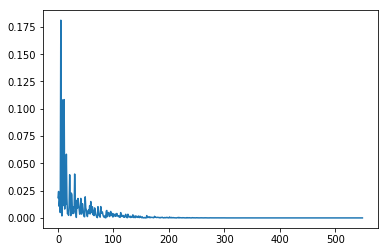

In [69]:
# 2 neuron input layer , 6 neuron hidden layer, 1 neuron output layer 
size=np.array([2,6,1]) 
biases=[np.random.randn(y, 1) for y in size[1:]]
weights = [np.random.randn(y, x) 
                        for x, y in zip(size[:-1], size[1:])]
#Data
yd=data_labels.T
xd=data_feature.T
num_layers=len(size)

def feedforward(a):
    for b, w in zip(biases,weights):
        a=tanh(np.dot(w,a)+b)
    return a

def cost_derivative(output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)  
def backprop(x,y):
    #x=data_feature.T
    nabla_b=[np.zeros(b.shape) for b in biases]
    nabla_w=[np.zeros(w.shape) for w in weights]

#feed forward
    activation=x
    activations=[x]
    zs=[]
    for b, w in zip(biases,weights):
        z=np.dot(w,activation)+b
        zs.append(z)
        activation=tanh(z)
        activations.append(activation)
#backward pass    
    delta=cost_derivative(activations[-1],y)*tanh_deriv(zs[-1]) #BP1
    nabla_b[-1]=delta
    nabla_w[-1]=np.dot(delta,activations[-2].T)
    for l in range(2,num_layers):
        z=zs[-l]
        sp=tanh_deriv(z)
        delta=np.dot(weights[-l+1].T,delta)*sp
        nabla_b[-l]=delta
        nabla_w[-l]=np.dot(delta,activations[-l-1].T)
    return (nabla_b,nabla_w) 

#Initialize for making the cost plot
xplot=[]
costplot=[]
#Run gradient descent 

#learning rate
lr = 0.1

for epoch in range(550):
    #Create an array of indexes, same as length of training data
    a=np.arange(len(data_feature))
    #Randomly shuffle the array
    random.shuffle(a)
    yd=data_labels.T
    xd=data_feature.T
    #Pick the first element of a and choose one data point and the corresponding label
    x=xd[:,a[0]:a[0]+1] #make sure it is a numpy array and not a vector
    y=yd[:,a[0]:a[0]+1]
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    delta_nabla_b, delta_nabla_w=backprop(x,y)
    nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
    #print('nb',nabla_b)
    nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    weights = [w-(lr*nw) for w, nw in zip(weights, nabla_w)]
    biases=[b-(lr*nb) for b, nb in zip(biases,nabla_b)]
    # See the output of the network, with the updated weights and biases
    error_out = ((1 / 2) * (np.power((feedforward(x) - y), 2)))
    #Add cost and epoch 
    xplot.append(epoch)
    costplot.append(error_out.sum())    
plt.plot(xplot,costplot)  
#print the minimum of cost
print("last point cost",(costplot[-1]))

In [63]:
feedforward(data_feature.T)

array([[-0.51674473,  0.31718683,  0.30439904, -0.51479707]])

Add momentum now.


Last point cost 6.584769696247264e-24


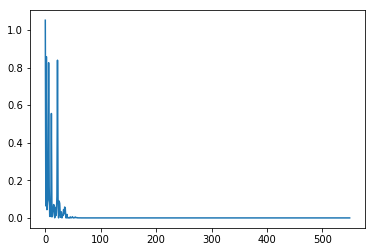

In [115]:
# 2 neuron input layer , 6 neuron hidden layer, 1 neuron output layer 
size=np.array([2,6,1]) 

biases=[np.random.randn(y, 1) for y in size[1:]]
weights = [np.random.randn(y, x) for x, y in zip(size[:-1], size[1:])]

bv=[np.random.randn(y, 1) for y in size[1:]]
wv=[np.random.randn(y, x) for x, y in zip(size[:-1], size[1:])]
#Data
yd=data_labels.T
xd=data_feature.T
num_layers=len(size)

def feedforward(a):
    for b, w in zip(biases,weights):
        a=tanh(np.dot(w,a)+b)
    return a

def cost_derivative(output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)  
def backprop(x,y):
    #x=data_feature.T
    nabla_b=[np.zeros(b.shape) for b in biases]
    nabla_w=[np.zeros(w.shape) for w in weights]

#feed forward
    activation=x
    activations=[x]
    zs=[]
    for b, w in zip(biases,weights):
        z=np.dot(w,activation)+b
        zs.append(z)
        activation=tanh(z)
        activations.append(activation)
#backward pass    
    delta=cost_derivative(activations[-1],y)*tanh_deriv(zs[-1]) #BP1
    nabla_b[-1]=delta
    nabla_w[-1]=np.dot(delta,activations[-2].T)
    for l in range(2,num_layers):
        z=zs[-l]
        sp=tanh_deriv(z)
        delta=np.dot(weights[-l+1].T,delta)*sp
        nabla_b[-l]=delta
        nabla_w[-l]=np.dot(delta,activations[-l-1].T)
    return (nabla_b,nabla_w) 

#Initialize for making the cost plot
xplot=[]
costplot=[]
#Run gradient descent 

#learning rate
lr = 0.18
#momentum
m=0.4
for epoch in range(550):
    #Create an array of indexes, same as length of training data
    a=np.arange(len(data_feature))
    #Randomly shuffle the array
    random.shuffle(a)
    yd=data_labels.T
    xd=data_feature.T
    
    #Pick the first element of a and choose one data point and the corresponding label
    x=xd[:,a[0]:a[0]+1] #make sure it is a numpy array and not a vector
    y=yd[:,a[0]:a[0]+1]
    
    #nabla_b = [np.zeros(b.shape) for b in biases]
    #nabla_w = [np.zeros(w.shape) for w in weights]
   # print('epoch',epoch)
    
    delta_nabla_b, delta_nabla_w=backprop(x,y)
    #nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
    nabla_b=delta_nabla_b
    
    #nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    nabla_w=delta_nabla_w
    
   # weights = [m*w+(lr*nw) for w, nw in zip(weights, nabla_w)] 
    wv=[m*wv-lr*nw for wv, nw in zip(wv, nabla_w)]
    weights=[w+wv for w, wv in zip(weights,wv)]
    
    #weights=[(1-m)*w-1*(lr*nw) for w, nw in zip(weights, nabla_w)] 
    bv=[m*bv-lr*nb for bv, nb in zip(bv,nabla_b)]
    biases=[b+bv for b, bv in zip(biases,bv)]

    # See the output of the network, with the updated weights and biases
    error_out = ((1 / 2) * (np.power((feedforward(x) - y), 2)))
    #Add cost and epoch 
    xplot.append(epoch)
    costplot.append(error_out.sum())    
plt.plot(xplot,costplot)  
#print the minimum of cost
print("Last point cost",(costplot[-1]))

In [102]:
feedforward(data_feature.T)

array([[-0.5,  0.5,  0.5, -0.5]])

First thought: Somthing is wrong, with momentum it should converge fast. Do not see it doing it. 

Second thought:
Alright, works. Looks like it depends on the initialization. 

